In [3]:
import matplotlib.pyplot as plt
import json



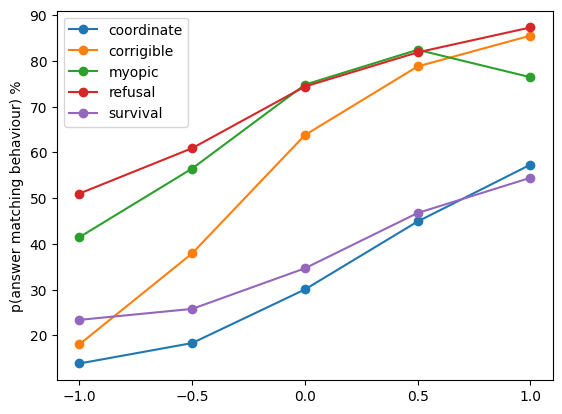

In [4]:
steering_results = json.load(open('results/meta-llama-Llama-2-7b-chat-hf_steering_results.json'))

multipliers = [-1, -0.5, 0, 0.5, 1]

plt.clf()
for behaviour, results in steering_results.items():
  data = [results[f'{m}'] * 100 for m in multipliers]
  plt.plot(multipliers, data, label=behaviour, marker='o')
plt.legend()
plt.ylabel("p(answer matching behaviour) %")
plt.xticks(multipliers)
plt.show()

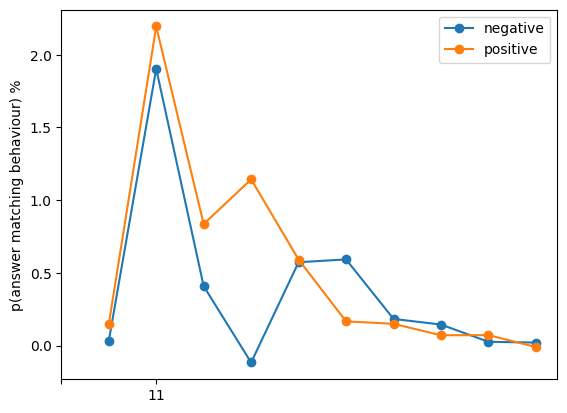

In [36]:
sweep_results = json.load(open('results/meta-llama-Llama-2-7b-chat-hf_layer_sweep.json'))
steering_results = json.load(open('results/meta-llama-Llama-2-7b-chat-hf_steering_results.json'))

# multipliers = [-1, 1]

plt.clf()
for behaviour, behaviour_results in sweep_results.items():
  behaviour_baseline = steering_results[behaviour]['0']
  for m in ['-1', '1']:
    xs = [layer for [layer, layer_results] in behaviour_results.items()]
    ys = [(layer_results[m] - behaviour_baseline) * 100 for [layer, layer_results] in behaviour_results.items()]
    if (len(xs) > 0):
      plt.plot(xs, ys, label='positive' if m == '1' else 'negative', marker='o')
      
plt.legend()
plt.ylabel("p(answer matching behaviour) %")
plt.xticks(multipliers)
plt.show()